In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [134]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from pylab import rcParams
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [135]:
train_claim = pd.read_csv('/content/drive/MyDrive/Hackton/Train_Claim.csv')
train_vehicle = pd.read_csv('/content/drive/MyDrive/Hackton/Train_Vehicle.csv')
train_policy = pd.read_csv('/content/drive/MyDrive/Hackton/Train_Policy.csv')
train_demographics = pd.read_csv('/content/drive/MyDrive/Hackton/Train_Demographics.csv')
test_claim = pd.read_csv('/content/drive/MyDrive/Hackton/Test_Claim.csv')
test_vehicle = pd.read_csv('/content/drive/MyDrive/Hackton/Test_Vehicle.csv')
test_policy = pd.read_csv('/content/drive/MyDrive/Hackton/Test_Policy.csv')
test_demographics= pd.read_csv('/content/drive/MyDrive/Hackton/Test_Demographics.csv')
traindata_target = pd.read_csv('/content/drive/MyDrive/Hackton/Traindata_with_Target.csv')

In [136]:
train_claim.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481


In [137]:
train_policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007


In [138]:
train_demographics.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India


In [139]:
train_vehicle.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212


In [140]:
 vehicle = train_vehicle.pivot(index = 'CustomerID',columns = 'VehicleAttribute',values = 'VehicleAttributeDetails')
 vehicle.head()

VehicleAttribute,VehicleID,VehicleMake,VehicleModel,VehicleYOM
CustomerID,,,,
Cust10000,Vehicle26917,Audi,A5,2008
Cust10001,Vehicle15893,Audi,A5,2006
Cust10002,Vehicle5152,Volkswagen,Jetta,1999
Cust10003,Vehicle37363,Volkswagen,Jetta,2003
Cust10004,Vehicle28633,Toyota,CRV,2010


In [141]:
data = pd.merge(train_policy,train_demographics,on='CustomerID')
data.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001,48,466132,MALE,MD,craft-repair,sleeping,53300,0,India
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004,41,608117,FEMALE,PhD,armed-forces,board-games,48900,-62400,India
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005,44,610706,MALE,Associate,sales,board-games,66000,-46000,India
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006,39,478456,FEMALE,PhD,tech-support,bungie-jumping,0,0,India
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007,34,441716,MALE,PhD,prof-specialty,board-games,0,-77000,India


In [142]:
df = pd.merge(data,train_claim,on='CustomerID')
df.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001,48,466132,MALE,MD,craft-repair,sleeping,53300,0,India,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,State7,City2,Location 1596,5,1,YES,1,2,YES,71610,6510,13020,52080
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004,41,608117,FEMALE,PhD,armed-forces,board-games,48900,-62400,India,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,State3,City1,Location 2054,5,1,?,1,2,NO,63400,6340,6340,50720
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005,44,610706,MALE,Associate,sales,board-games,66000,-46000,India,2015-02-17,Vehicle Theft,?,Minor Damage,None,State5,City1,Location 1518,20,1,NO,0,1,NO,6500,1300,650,4550
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006,39,478456,FEMALE,PhD,tech-support,bungie-jumping,0,0,India,2015-01-02,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,State7,City1,Location 2051,19,3,NO,0,2,NO,64100,6410,6410,51280
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007,34,441716,MALE,PhD,prof-specialty,board-games,0,-77000,India,2015-01-13,Multi-vehicle Collision,Front Collision,Minor Damage,Police,State5,City7,Location 1986,0,3,?,0,0,?,78650,21450,7150,50050


In [143]:
df1 = pd.merge(df,vehicle,on='CustomerID')
df1.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001,48,466132,MALE,MD,craft-repair,sleeping,53300,0,India,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,State7,City2,Location 1596,5,1,YES,1,2,YES,71610,6510,13020,52080,Vehicle28516,Saab,92x,2004
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004,41,608117,FEMALE,PhD,armed-forces,board-games,48900,-62400,India,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,State3,City1,Location 2054,5,1,?,1,2,NO,63400,6340,6340,50720,Vehicle17051,Chevrolet,Tahoe,2014
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005,44,610706,MALE,Associate,sales,board-games,66000,-46000,India,2015-02-17,Vehicle Theft,?,Minor Damage,None,State5,City1,Location 1518,20,1,NO,0,1,NO,6500,1300,650,4550,Vehicle26158,Accura,RSX,2009
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006,39,478456,FEMALE,PhD,tech-support,bungie-jumping,0,0,India,2015-01-02,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,State7,City1,Location 2051,19,3,NO,0,2,NO,64100,6410,6410,51280,Vehicle32811,Saab,95,2003
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007,34,441716,MALE,PhD,prof-specialty,board-games,0,-77000,India,2015-01-13,Multi-vehicle Collision,Front Collision,Minor Damage,Police,State5,City7,Location 1986,0,3,?,0,0,?,78650,21450,7150,50050,Vehicle32845,Nissan,Pathfinder,2012


In [144]:
train = pd.merge(df1,traindata_target,on='CustomerID')
train.head().T

,0,1,2,3,4
InsurancePolicyNumber,110122,110125,110126,110127,110128
CustomerLoyaltyPeriod,328,256,228,256,137
DateOfPolicyCoverage,2014-10-17,1990-05-25,2014-06-06,2006-10-12,2000-06-04
InsurancePolicyState,State3,State1,State1,State3,State2
Policy_CombinedSingleLimit,250/500,250/500,500/1000,250/500,250/500
Policy_Deductible,1000,2000,1000,1000,1000
PolicyAnnualPremium,1406.91,1415.74,1583.91,1351.1,1333.35
UmbrellaLimit,0,6000000,6000000,0,0
InsuredRelationship,husband,unmarried,unmarried,unmarried,husband
CustomerID,Cust1001,Cust1004,Cust1005,Cust1006,Cust1007


In [145]:


train.shape

(28836, 42)

In [146]:

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InsurancePolicyNumber       28836 non-null  int64  
 1   CustomerLoyaltyPeriod       28836 non-null  int64  
 2   DateOfPolicyCoverage        28836 non-null  object 
 3   InsurancePolicyState        28836 non-null  object 
 4   Policy_CombinedSingleLimit  28836 non-null  object 
 5   Policy_Deductible           28836 non-null  int64  
 6   PolicyAnnualPremium         28836 non-null  float64
 7   UmbrellaLimit               28836 non-null  int64  
 8   InsuredRelationship         28836 non-null  object 
 9   CustomerID                  28836 non-null  object 
 10  InsuredAge                  28836 non-null  int64  
 11  InsuredZipCode              28836 non-null  int64  
 12  InsuredGender               28806 non-null  object 
 13  InsuredEducationLevel       288

In [147]:
train.nunique()

InsurancePolicyNumber         28836
CustomerLoyaltyPeriod           479
DateOfPolicyCoverage           6779
InsurancePolicyState              3
Policy_CombinedSingleLimit        9
Policy_Deductible              1496
PolicyAnnualPremium           23852
UmbrellaLimit                  7089
InsuredRelationship               6
CustomerID                    28836
InsuredAge                       46
InsuredZipCode                  995
InsuredGender                     2
InsuredEducationLevel             7
InsuredOccupation                14
InsuredHobbies                   20
CapitalGains                    338
CapitalLoss                     354
Country                           1
DateOfIncident                   72
TypeOfIncident                    4
TypeOfCollission                  4
SeverityOfIncident                4
AuthoritiesContacted              5
IncidentState                     7
IncidentCity                      7
IncidentAddress                1000
IncidentTime                

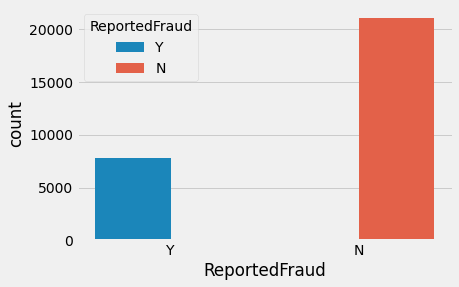

In [148]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='ReportedFraud', data=train, hue='ReportedFraud')

In [149]:
# Count number of frauds vs non-frauds
train['ReportedFraud'].value_counts() 

N    21051
Y     7785
Name: ReportedFraud, dtype: int64

Data visualisation

In [150]:
train['IncidentState'].value_counts()

State5    7886
State7    7168
State9    6161
State8    3181
State4    3029
State6     810
State3     601
Name: IncidentState, dtype: int64

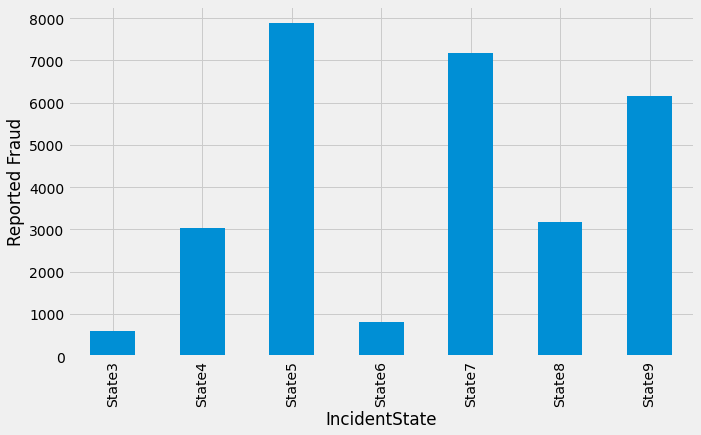

In [151]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = train.groupby('IncidentState').ReportedFraud.count().plot.bar(ylim=0)
ax.set_ylabel('Reported Fraud')
plt.show()

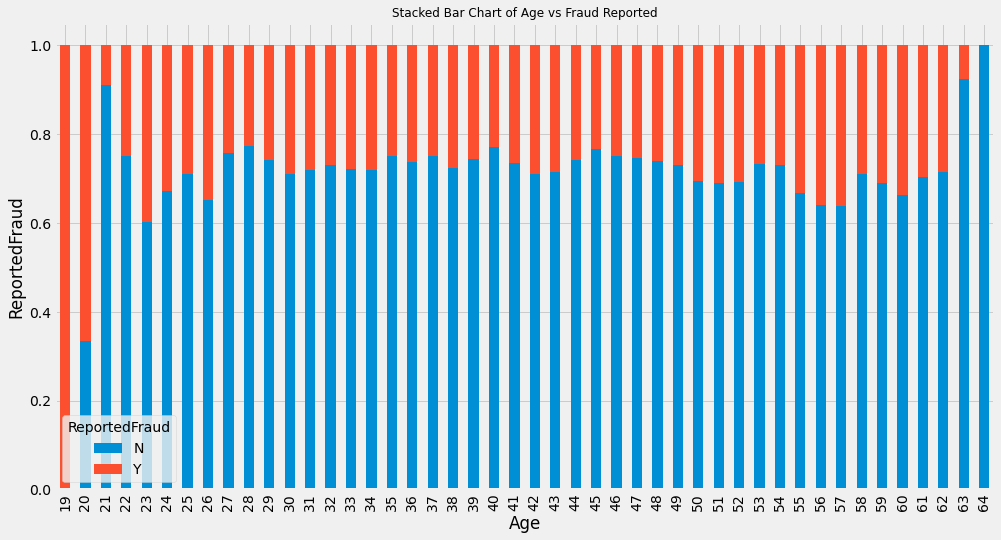

In [152]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(train.InsuredAge, train.ReportedFraud)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs Fraud Reported', fontsize=12)
plt.xlabel('Age')
plt.ylabel('ReportedFraud')
plt.show()

Text(0, 0.5, 'Fraud reported')

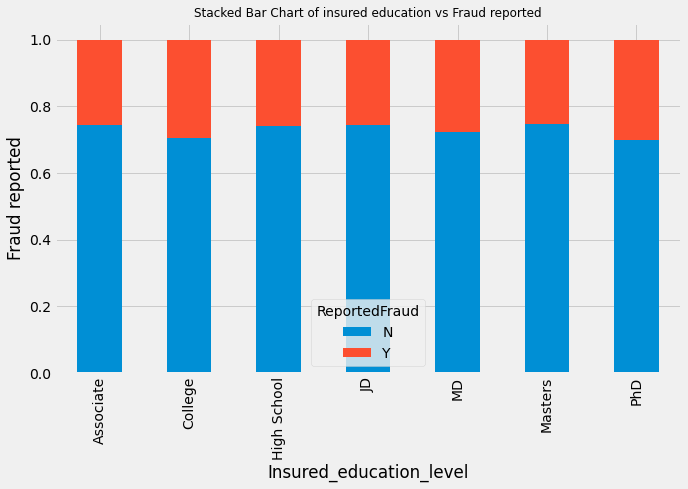

In [153]:
plt.rcParams['figure.figsize'] = [10, 6]
table=pd.crosstab(train.InsuredEducationLevel, train.ReportedFraud)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured education vs Fraud reported', fontsize=12)
plt.xlabel('Insured_education_level')
plt.ylabel('Fraud reported')

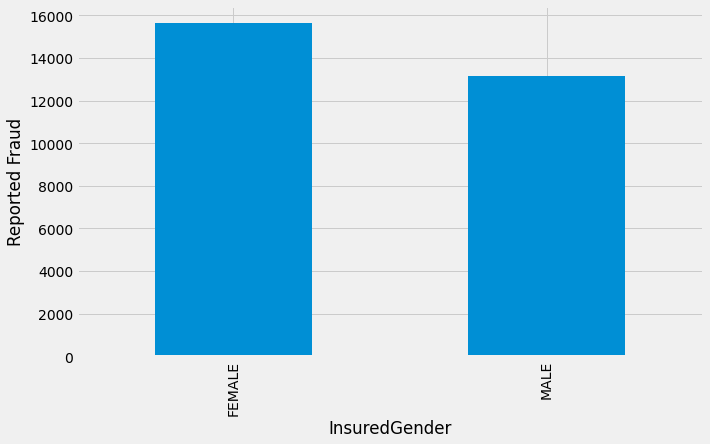

In [154]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = train.groupby('InsuredGender').ReportedFraud.count().plot.bar(ylim=0)
ax.set_ylabel('Reported Fraud')
plt.show()

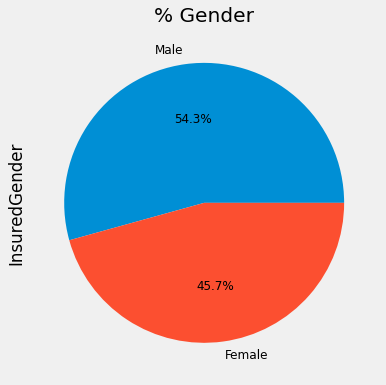

In [155]:
ax = (df['InsuredGender'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()

data preprocessing

In [156]:
train['ReportedFraud'].replace(to_replace='Y', value=1, inplace=True)
train['ReportedFraud'].replace(to_replace='N',  value=0, inplace=True)

train.head()


,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001,48,466132,MALE,MD,craft-repair,sleeping,53300,0,India,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,State7,City2,Location 1596,5,1,YES,1,2,YES,71610,6510,13020,52080,Vehicle28516,Saab,92x,2004,1
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004,41,608117,FEMALE,PhD,armed-forces,board-games,48900,-62400,India,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,State3,City1,Location 2054,5,1,?,1,2,NO,63400,6340,6340,50720,Vehicle17051,Chevrolet,Tahoe,2014,1
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005,44,610706,MALE,Associate,sales,board-games,66000,-46000,India,2015-02-17,Vehicle Theft,?,Minor Damage,None,State5,City1,Location 1518,20,1,NO,0,1,NO,6500,1300,650,4550,Vehicle26158,Accura,RSX,2009,0
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006,39,478456,FEMALE,PhD,tech-support,bungie-jumping,0,0,India,2015-01-02,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,State7,City1,Location 2051,19,3,NO,0,2,NO,64100,6410,6410,51280,Vehicle32811,Saab,95,2003,1
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007,34,441716,MALE,PhD,prof-specialty,board-games,0,-77000,India,2015-01-13,Multi-vehicle Collision,Front Collision,Minor Damage,Police,State5,City7,Location 1986,0,3,?,0,0,?,78650,21450,7150,50050,Vehicle32845,Nissan,Pathfinder,2012,0


In [157]:
train.describe(include='all')


,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
count,28836.000000,28836.000000,28836,28836,28836,28836.000000,28836.000000,2.883600e+04,28836,28836,28836.000000,28836.000000,28806,28836,28836,28836,28836.000000,28836.000000,28834,28836,28836,28836,28836,28836,28836,28836,28836,28836.000000,28836.000000,28836,28836.000000,28836,28836,28836,28836.000000,28836.000000,28836.000000,28836,28836,28836,28836,28836.000000
unique,NaN,NaN,6779,3,9,NaN,NaN,NaN,6,28836,NaN,NaN,2,7,14,20,NaN,NaN,1,72,4,4,4,5,7,7,1000,NaN,NaN,3,NaN,5,3,21976,NaN,NaN,NaN,28836,15,39,21,NaN
top,NaN,NaN,1998-11-11,State3,250/500,NaN,NaN,NaN,own-child,Cust1001,NaN,NaN,FEMALE,JD,machine-op-inspct,bungie-jumping,NaN,NaN,India,2015-01-10,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1341,NaN,NaN,?,NaN,2,NO,MISSEDDATA,NaN,NaN,NaN,Vehicle28516,Saab,RAM,2007,NaN
freq,NaN,NaN,38,10146,8260,NaN,NaN,NaN,5242,1,NaN,NaN,15644,4808,2798,1751,NaN,NaN,28834,661,11966,8561,10400,8324,7886,4486,73,NaN,NaN,10459,NaN,8449,9898,50,NaN,NaN,NaN,1,2415,1344,1730,NaN
mean,129312.517097,203.067867,NaN,NaN,NaN,1114.282529,1255.528382,9.836680e+05,NaN,NaN,38.815370,502436.579068,NaN,NaN,NaN,NaN,23066.569566,-24940.612429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.746047,1.823207,NaN,0.985782,NaN,NaN,NaN,7337.118428,7283.870197,37687.129387,NaN,NaN,NaN,NaN,0.269975
std,11114.060267,99.932951,NaN,NaN,NaN,546.632816,223.013899,1.969282e+06,NaN,NaN,7.996377,72250.868871,NaN,NaN,NaN,NaN,27637.813724,27913.209608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.170069,0.980099,NaN,0.784764,NaN,NaN,NaN,4427.638593,4375.842738,17977.048232,NaN,NaN,NaN,NaN,0.443954
min,110122.000000,1.000000,NaN,NaN,NaN,500.000000,-1.000000,-1.000000e+06,NaN,NaN,19.000000,430104.000000,NaN,NaN,NaN,NaN,0.000000,-111100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.000000,1.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,109.000000,NaN,NaN,NaN,NaN,0.000000
25%,119698.750000,126.000000,NaN,NaN,NaN,622.000000,1122.007500,0.000000e+00,NaN,NaN,33.000000,448603.000000,NaN,NaN,NaN,NaN,0.000000,-50000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.000000,NaN,0.000000,NaN,NaN,NaN,4743.750000,4862.000000,32193.250000,NaN,NaN,NaN,NaN,0.000000
50%,129278.500000,199.000000,NaN,NaN,NaN,1000.000000,1265.205000,0.000000e+00,NaN,NaN,38.000000,466691.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,7147.000000,7051.000000,42457.500000,NaN,NaN,NaN,NaN,0.000000
75%,138933.250000,267.000000,NaN,NaN,NaN,1627.000000,1396.605000,4.859610e+05,NaN,NaN,44.000000,603848.000000,NaN,NaN,NaN,NaN,49000.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,3.000000,NaN,2.000000,NaN,NaN,NaN,10571.250000,10327.000000,49535.750000,NaN,NaN,NaN,NaN,1.000000


<Figure size 720x432 with 0 Axes>

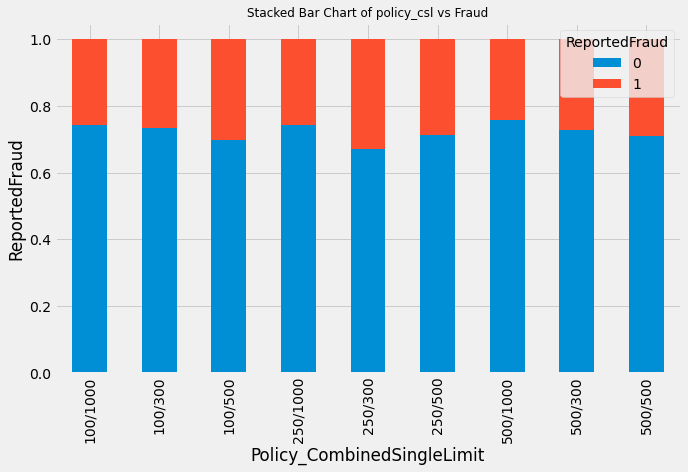

In [158]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
table=pd.crosstab(train.Policy_CombinedSingleLimit, train.ReportedFraud)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of policy_csl vs Fraud', fontsize=12)
plt.xlabel('Policy_CombinedSingleLimit')
plt.ylabel('ReportedFraud')
plt.show()

In [159]:
train['csl_per_person'] = train.Policy_CombinedSingleLimit.str.split('/', expand=True)[0]
train['csl_per_accident'] = train.Policy_CombinedSingleLimit.str.split('/', expand=True)[1]

In [160]:
train['csl_per_person'].head()

0    250
1    250
2    500
3    250
4    250
Name: csl_per_person, dtype: object

In [161]:
train['csl_per_accident'].head()

0     500
1     500
2    1000
3     500
4     500
Name: csl_per_accident, dtype: object

In [162]:
train.VehicleYOM.value_counts()  # check the spread of years to decide on further action.

2007    1730
2004    1691
2010    1686
2006    1680
2009    1655
2008    1655
2005    1653
2003    1606
2011    1581
2002    1551
2000    1548
1999    1521
2001    1458
2012    1357
1998    1319
2013    1271
1997    1151
2014     889
1996     851
1995     555
2015     428
Name: VehicleYOM, dtype: int64

In [163]:
train['VehicleYOM'].astype(int)

0        2004
1        2014
2        2009
3        2003
4        2012
         ... 
28831    2005
28832    2004
28833    1999
28834    2006
28835    2001
Name: VehicleYOM, Length: 28836, dtype: int64

In [164]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
train['incident_period_of_day'] = pd.cut(train.IncidentTime, bins, labels=names).astype(object)
train[['IncidentTime', 'incident_period_of_day']].head(20)

,IncidentTime,incident_period_of_day
0,5,early_morning
1,5,early_morning
2,20,evening
3,19,evening
4,0,past_midnight
5,21,night
6,14,afternoon
7,22,night
8,21,night
9,9,morning


In [165]:
# Check on categorical variables:
train.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'InsuredRelationship', 'CustomerID',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'Country', 'DateOfIncident', 'TypeOfIncident',
       'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted',
       'IncidentState', 'IncidentCity', 'IncidentAddress', 'PropertyDamage',
       'Witnesses', 'PoliceReport', 'AmountOfTotalClaim', 'VehicleID',
       'VehicleMake', 'VehicleModel', 'VehicleYOM', 'csl_per_person',
       'csl_per_accident', 'incident_period_of_day'],
      dtype='object')

In [166]:
train = train.drop(columns = ['InsurancePolicyNumber','Policy_CombinedSingleLimit','InsuredZipCode','DateOfPolicyCoverage','DateOfIncident','IncidentAddress','Country','IncidentTime'])

In [167]:
train = train.drop(['VehicleYOM','VehicleModel'],axis=1)

In [168]:
train.head(2)

,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID,InsuredAge,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,VehicleID,VehicleMake,ReportedFraud,csl_per_person,csl_per_accident,incident_period_of_day
0,328,State3,1000,1406.91,0,husband,Cust1001,48,MALE,MD,craft-repair,sleeping,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,State7,City2,1,YES,1,2,YES,71610,6510,13020,52080,Vehicle28516,Saab,1,250,500,early_morning
1,256,State1,2000,1415.74,6000000,unmarried,Cust1004,41,FEMALE,PhD,armed-forces,board-games,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,State3,City1,1,?,1,2,NO,63400,6340,6340,50720,Vehicle17051,Chevrolet,1,250,500,early_morning


In [169]:
# identify variables with '?' values
unknowns = {}
for i in list(train.columns):
    if (train[i]).dtype == object:
        j = np.sum(train[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                            0
InsurancePolicyState        0
InsuredRelationship         0
CustomerID                  0
InsuredGender               0
InsuredEducationLevel       0
InsuredOccupation           0
InsuredHobbies              0
TypeOfIncident              0
TypeOfCollission         5162
SeverityOfIncident          0
AuthoritiesContacted        0
IncidentState               0
IncidentCity                0
PropertyDamage          10459
Witnesses                   0
PoliceReport             9805
AmountOfTotalClaim          0
VehicleID                   0
VehicleMake                 0
csl_per_person              0
csl_per_accident            0
incident_period_of_day      0


In [170]:
train.TypeOfCollission.value_counts()

Rear Collision     8561
Side Collision     7867
Front Collision    7246
?                  5162
Name: TypeOfCollission, dtype: int64

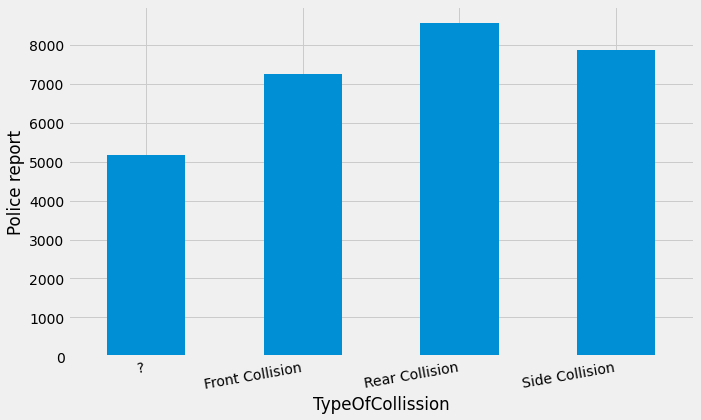

In [171]:

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= train.groupby('TypeOfCollission').PoliceReport.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [172]:
train.PropertyDamage.value_counts()

?      10459
NO      9687
YES     8690
Name: PropertyDamage, dtype: int64

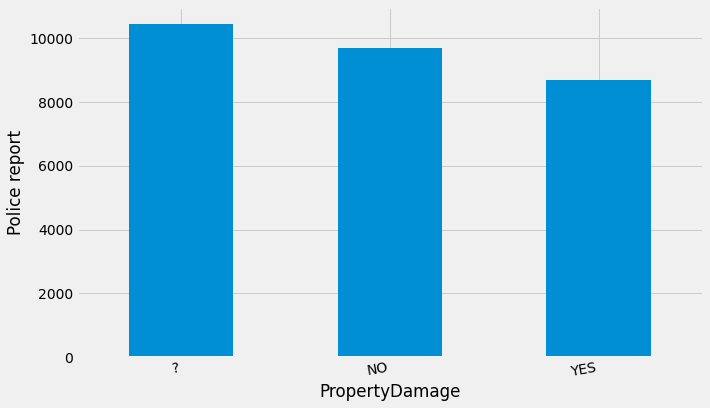

In [173]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= train.groupby('PropertyDamage').PoliceReport.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [174]:
train.PoliceReport.value_counts()

NO     9898
?      9805
YES    9133
Name: PoliceReport, dtype: int64

In [175]:
train.columns

Index(['CustomerLoyaltyPeriod', 'InsurancePolicyState', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'CustomerID', 'InsuredAge', 'InsuredGender', 'InsuredEducationLevel',
       'InsuredOccupation', 'InsuredHobbies', 'CapitalGains', 'CapitalLoss',
       'TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity',
       'NumberOfVehicles', 'PropertyDamage', 'BodilyInjuries', 'Witnesses',
       'PoliceReport', 'AmountOfTotalClaim', 'AmountOfInjuryClaim',
       'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'VehicleID',
       'VehicleMake', 'ReportedFraud', 'csl_per_person', 'csl_per_accident',
       'incident_period_of_day'],
      dtype='object')

In [176]:
train._get_numeric_data().head()  # Checking numeric columns

,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredAge,CapitalGains,CapitalLoss,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,ReportedFraud
0,328,1000,1406.91,0,48,53300,0,1,1,6510,13020,52080,1
1,256,2000,1415.74,6000000,41,48900,-62400,1,1,6340,6340,50720,1
2,228,1000,1583.91,6000000,44,66000,-46000,1,0,1300,650,4550,0
3,256,1000,1351.10,0,39,0,0,3,0,6410,6410,51280,1
4,137,1000,1333.35,0,34,0,-77000,3,0,21450,7150,50050,0


In [177]:
train._get_numeric_data().columns

Index(['CustomerLoyaltyPeriod', 'Policy_Deductible', 'PolicyAnnualPremium',
       'UmbrellaLimit', 'InsuredAge', 'CapitalGains', 'CapitalLoss',
       'NumberOfVehicles', 'BodilyInjuries', 'AmountOfInjuryClaim',
       'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'ReportedFraud'],
      dtype='object')

In [178]:
train.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['InsurancePolicyState', 'InsuredRelationship', 'CustomerID',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'PropertyDamage', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'VehicleID', 'VehicleMake', 'csl_per_person',
       'csl_per_accident', 'incident_period_of_day'],
      dtype='object')

In [179]:
dummies = pd.get_dummies(train[[
    'InsurancePolicyState', 
    'InsuredGender', 
    'InsuredEducationLevel',
    'InsuredOccupation', 
    'InsuredHobbies', 
    'InsuredRelationship',
    'TypeOfIncident', 
    'SeverityOfIncident',
    'AuthoritiesContacted', 
    'IncidentState', 
    'IncidentCity',
    'VehicleMake', 
    'csl_per_person', 
    'csl_per_accident',
    'incident_period_of_day']])

dummies = dummies.join(train[[
    'TypeOfCollission', 
    'PropertyDamage', 
    'PoliceReport', 
    "ReportedFraud"]])

dummies.head()

,InsurancePolicyState_State1,InsurancePolicyState_State2,InsurancePolicyState_State3,InsuredGender_FEMALE,InsuredGender_MALE,InsuredEducationLevel_Associate,InsuredEducationLevel_College,InsuredEducationLevel_High School,InsuredEducationLevel_JD,InsuredEducationLevel_MD,InsuredEducationLevel_Masters,InsuredEducationLevel_PhD,InsuredOccupation_adm-clerical,InsuredOccupation_armed-forces,InsuredOccupation_craft-repair,InsuredOccupation_exec-managerial,InsuredOccupation_farming-fishing,InsuredOccupation_handlers-cleaners,InsuredOccupation_machine-op-inspct,InsuredOccupation_other-service,InsuredOccupation_priv-house-serv,InsuredOccupation_prof-specialty,InsuredOccupation_protective-serv,InsuredOccupation_sales,InsuredOccupation_tech-support,InsuredOccupation_transport-moving,InsuredHobbies_base-jumping,InsuredHobbies_basketball,InsuredHobbies_board-games,InsuredHobbies_bungie-jumping,InsuredHobbies_camping,InsuredHobbies_chess,InsuredHobbies_cross-fit,InsuredHobbies_dancing,InsuredHobbies_exercise,InsuredHobbies_golf,InsuredHobbies_hiking,InsuredHobbies_kayaking,InsuredHobbies_movies,InsuredHobbies_paintball,InsuredHobbies_polo,InsuredHobbies_reading,InsuredHobbies_skydiving,InsuredHobbies_sleeping,InsuredHobbies_video-games,InsuredHobbies_yachting,InsuredRelationship_husband,InsuredRelationship_not-in-family,InsuredRelationship_other-relative,InsuredRelationship_own-child,InsuredRelationship_unmarried,InsuredRelationship_wife,TypeOfIncident_Multi-vehicle Collision,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,SeverityOfIncident_Major Damage,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Ambulance,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,IncidentState_State3,IncidentState_State4,IncidentState_State5,IncidentState_State6,IncidentState_State7,IncidentState_State8,IncidentState_State9,IncidentCity_City1,IncidentCity_City2,IncidentCity_City3,IncidentCity_City4,IncidentCity_City5,IncidentCity_City6,IncidentCity_City7,VehicleMake_???,VehicleMake_Accura,VehicleMake_Audi,VehicleMake_BMW,VehicleMake_Chevrolet,VehicleMake_Dodge,VehicleMake_Ford,VehicleMake_Honda,VehicleMake_Jeep,VehicleMake_Mercedes,VehicleMake_Nissan,VehicleMake_Saab,VehicleMake_Suburu,VehicleMake_Toyota,VehicleMake_Volkswagen,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,TypeOfCollission,PropertyDamage,PoliceReport,ReportedFraud
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,Side Collision,YES,YES,1
1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,Front Collision,?,NO,1
2,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,?,NO,NO,0
3,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,Rear Collision,NO,NO,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,Front Collision,?,?,0


In [180]:
X = dummies.iloc[:, 0:-1]  # predictor variables
y = dummies.iloc[:, -1]  # target variable

In [181]:
len(X.columns)

110

In [182]:
X.head(2)

,InsurancePolicyState_State1,InsurancePolicyState_State2,InsurancePolicyState_State3,InsuredGender_FEMALE,InsuredGender_MALE,InsuredEducationLevel_Associate,InsuredEducationLevel_College,InsuredEducationLevel_High School,InsuredEducationLevel_JD,InsuredEducationLevel_MD,InsuredEducationLevel_Masters,InsuredEducationLevel_PhD,InsuredOccupation_adm-clerical,InsuredOccupation_armed-forces,InsuredOccupation_craft-repair,InsuredOccupation_exec-managerial,InsuredOccupation_farming-fishing,InsuredOccupation_handlers-cleaners,InsuredOccupation_machine-op-inspct,InsuredOccupation_other-service,InsuredOccupation_priv-house-serv,InsuredOccupation_prof-specialty,InsuredOccupation_protective-serv,InsuredOccupation_sales,InsuredOccupation_tech-support,InsuredOccupation_transport-moving,InsuredHobbies_base-jumping,InsuredHobbies_basketball,InsuredHobbies_board-games,InsuredHobbies_bungie-jumping,InsuredHobbies_camping,InsuredHobbies_chess,InsuredHobbies_cross-fit,InsuredHobbies_dancing,InsuredHobbies_exercise,InsuredHobbies_golf,InsuredHobbies_hiking,InsuredHobbies_kayaking,InsuredHobbies_movies,InsuredHobbies_paintball,InsuredHobbies_polo,InsuredHobbies_reading,InsuredHobbies_skydiving,InsuredHobbies_sleeping,InsuredHobbies_video-games,InsuredHobbies_yachting,InsuredRelationship_husband,InsuredRelationship_not-in-family,InsuredRelationship_other-relative,InsuredRelationship_own-child,InsuredRelationship_unmarried,InsuredRelationship_wife,TypeOfIncident_Multi-vehicle Collision,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,SeverityOfIncident_Major Damage,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Ambulance,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,IncidentState_State3,IncidentState_State4,IncidentState_State5,IncidentState_State6,IncidentState_State7,IncidentState_State8,IncidentState_State9,IncidentCity_City1,IncidentCity_City2,IncidentCity_City3,IncidentCity_City4,IncidentCity_City5,IncidentCity_City6,IncidentCity_City7,VehicleMake_???,VehicleMake_Accura,VehicleMake_Audi,VehicleMake_BMW,VehicleMake_Chevrolet,VehicleMake_Dodge,VehicleMake_Ford,VehicleMake_Honda,VehicleMake_Jeep,VehicleMake_Mercedes,VehicleMake_Nissan,VehicleMake_Saab,VehicleMake_Suburu,VehicleMake_Toyota,VehicleMake_Volkswagen,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,TypeOfCollission,PropertyDamage,PoliceReport
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,Side Collision,YES,YES
1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,Front Collision,?,NO


In [183]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: ReportedFraud, dtype: int64

In [184]:
from sklearn.preprocessing import LabelEncoder
X['collision_en'] = LabelEncoder().fit_transform(dummies['TypeOfCollission'])
X[['TypeOfCollission', 'collision_en']]

,TypeOfCollission,collision_en
0,Side Collision,3
1,Front Collision,1
2,?,0
3,Rear Collision,2
4,Front Collision,1
...,...,...
28831,?,0
28832,Rear Collision,2
28833,Rear Collision,2
28834,?,0


In [185]:
X['PropertyDamage'].replace(to_replace='YES', value=1, inplace=True)
X['PropertyDamage'].replace(to_replace='NO', value=0, inplace=True)
X['PropertyDamage'].replace(to_replace='?', value=0, inplace=True)
X['PoliceReport'].replace(to_replace='YES', value=1, inplace=True)
X['PoliceReport'].replace(to_replace='NO', value=0, inplace=True)
X['PoliceReport'].replace(to_replace='?', value=0, inplace=True)

X.head(10) 

,InsurancePolicyState_State1,InsurancePolicyState_State2,InsurancePolicyState_State3,InsuredGender_FEMALE,InsuredGender_MALE,InsuredEducationLevel_Associate,InsuredEducationLevel_College,InsuredEducationLevel_High School,InsuredEducationLevel_JD,InsuredEducationLevel_MD,InsuredEducationLevel_Masters,InsuredEducationLevel_PhD,InsuredOccupation_adm-clerical,InsuredOccupation_armed-forces,InsuredOccupation_craft-repair,InsuredOccupation_exec-managerial,InsuredOccupation_farming-fishing,InsuredOccupation_handlers-cleaners,InsuredOccupation_machine-op-inspct,InsuredOccupation_other-service,InsuredOccupation_priv-house-serv,InsuredOccupation_prof-specialty,InsuredOccupation_protective-serv,InsuredOccupation_sales,InsuredOccupation_tech-support,InsuredOccupation_transport-moving,InsuredHobbies_base-jumping,InsuredHobbies_basketball,InsuredHobbies_board-games,InsuredHobbies_bungie-jumping,InsuredHobbies_camping,InsuredHobbies_chess,InsuredHobbies_cross-fit,InsuredHobbies_dancing,InsuredHobbies_exercise,InsuredHobbies_golf,InsuredHobbies_hiking,InsuredHobbies_kayaking,InsuredHobbies_movies,InsuredHobbies_paintball,InsuredHobbies_polo,InsuredHobbies_reading,InsuredHobbies_skydiving,InsuredHobbies_sleeping,InsuredHobbies_video-games,InsuredHobbies_yachting,InsuredRelationship_husband,InsuredRelationship_not-in-family,InsuredRelationship_other-relative,InsuredRelationship_own-child,InsuredRelationship_unmarried,InsuredRelationship_wife,TypeOfIncident_Multi-vehicle Collision,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,SeverityOfIncident_Major Damage,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Ambulance,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,IncidentState_State3,IncidentState_State4,IncidentState_State5,IncidentState_State6,IncidentState_State7,IncidentState_State8,IncidentState_State9,IncidentCity_City1,IncidentCity_City2,IncidentCity_City3,IncidentCity_City4,IncidentCity_City5,IncidentCity_City6,IncidentCity_City7,VehicleMake_???,VehicleMake_Accura,VehicleMake_Audi,VehicleMake_BMW,VehicleMake_Chevrolet,VehicleMake_Dodge,VehicleMake_Ford,VehicleMake_Honda,VehicleMake_Jeep,VehicleMake_Mercedes,VehicleMake_Nissan,VehicleMake_Saab,VehicleMake_Suburu,VehicleMake_Toyota,VehicleMake_Volkswagen,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,TypeOfCollission,PropertyDamage,PoliceReport,collision_en
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,Side Collision,1,1,3
1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,Front Collision,0,0,1
2,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,?,0,0,0
3,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,Rear Collision,0,0,2
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,Front Collision,0,0,1
5,1,0,0,1,

In [186]:
X = X.drop(columns = ['TypeOfCollission'])
X.head(2)

,InsurancePolicyState_State1,InsurancePolicyState_State2,InsurancePolicyState_State3,InsuredGender_FEMALE,InsuredGender_MALE,InsuredEducationLevel_Associate,InsuredEducationLevel_College,InsuredEducationLevel_High School,InsuredEducationLevel_JD,InsuredEducationLevel_MD,InsuredEducationLevel_Masters,InsuredEducationLevel_PhD,InsuredOccupation_adm-clerical,InsuredOccupation_armed-forces,InsuredOccupation_craft-repair,InsuredOccupation_exec-managerial,InsuredOccupation_farming-fishing,InsuredOccupation_handlers-cleaners,InsuredOccupation_machine-op-inspct,InsuredOccupation_other-service,InsuredOccupation_priv-house-serv,InsuredOccupation_prof-specialty,InsuredOccupation_protective-serv,InsuredOccupation_sales,InsuredOccupation_tech-support,InsuredOccupation_transport-moving,InsuredHobbies_base-jumping,InsuredHobbies_basketball,InsuredHobbies_board-games,InsuredHobbies_bungie-jumping,InsuredHobbies_camping,InsuredHobbies_chess,InsuredHobbies_cross-fit,InsuredHobbies_dancing,InsuredHobbies_exercise,InsuredHobbies_golf,InsuredHobbies_hiking,InsuredHobbies_kayaking,InsuredHobbies_movies,InsuredHobbies_paintball,InsuredHobbies_polo,InsuredHobbies_reading,InsuredHobbies_skydiving,InsuredHobbies_sleeping,InsuredHobbies_video-games,InsuredHobbies_yachting,InsuredRelationship_husband,InsuredRelationship_not-in-family,InsuredRelationship_other-relative,InsuredRelationship_own-child,InsuredRelationship_unmarried,InsuredRelationship_wife,TypeOfIncident_Multi-vehicle Collision,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,SeverityOfIncident_Major Damage,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Ambulance,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,IncidentState_State3,IncidentState_State4,IncidentState_State5,IncidentState_State6,IncidentState_State7,IncidentState_State8,IncidentState_State9,IncidentCity_City1,IncidentCity_City2,IncidentCity_City3,IncidentCity_City4,IncidentCity_City5,IncidentCity_City6,IncidentCity_City7,VehicleMake_???,VehicleMake_Accura,VehicleMake_Audi,VehicleMake_BMW,VehicleMake_Chevrolet,VehicleMake_Dodge,VehicleMake_Ford,VehicleMake_Honda,VehicleMake_Jeep,VehicleMake_Mercedes,VehicleMake_Nissan,VehicleMake_Saab,VehicleMake_Suburu,VehicleMake_Toyota,VehicleMake_Volkswagen,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,PropertyDamage,PoliceReport,collision_en
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,3
1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1


In [187]:
X = pd.concat([X, df._get_numeric_data()], axis=1)  # joining numeric columns
X.head(2)

,InsurancePolicyState_State1,InsurancePolicyState_State2,InsurancePolicyState_State3,InsuredGender_FEMALE,InsuredGender_MALE,InsuredEducationLevel_Associate,InsuredEducationLevel_College,InsuredEducationLevel_High School,InsuredEducationLevel_JD,InsuredEducationLevel_MD,InsuredEducationLevel_Masters,InsuredEducationLevel_PhD,InsuredOccupation_adm-clerical,InsuredOccupation_armed-forces,InsuredOccupation_craft-repair,InsuredOccupation_exec-managerial,InsuredOccupation_farming-fishing,InsuredOccupation_handlers-cleaners,InsuredOccupation_machine-op-inspct,InsuredOccupation_other-service,InsuredOccupation_priv-house-serv,InsuredOccupation_prof-specialty,InsuredOccupation_protective-serv,InsuredOccupation_sales,InsuredOccupation_tech-support,InsuredOccupation_transport-moving,InsuredHobbies_base-jumping,InsuredHobbies_basketball,InsuredHobbies_board-games,InsuredHobbies_bungie-jumping,InsuredHobbies_camping,InsuredHobbies_chess,InsuredHobbies_cross-fit,InsuredHobbies_dancing,InsuredHobbies_exercise,InsuredHobbies_golf,InsuredHobbies_hiking,InsuredHobbies_kayaking,InsuredHobbies_movies,InsuredHobbies_paintball,InsuredHobbies_polo,InsuredHobbies_reading,InsuredHobbies_skydiving,InsuredHobbies_sleeping,InsuredHobbies_video-games,InsuredHobbies_yachting,InsuredRelationship_husband,InsuredRelationship_not-in-family,InsuredRelationship_other-relative,InsuredRelationship_own-child,InsuredRelationship_unmarried,InsuredRelationship_wife,TypeOfIncident_Multi-vehicle Collision,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,SeverityOfIncident_Major Damage,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Ambulance,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,IncidentState_State3,IncidentState_State4,IncidentState_State5,IncidentState_State6,IncidentState_State7,IncidentState_State8,IncidentState_State9,IncidentCity_City1,IncidentCity_City2,IncidentCity_City3,IncidentCity_City4,IncidentCity_City5,IncidentCity_City6,IncidentCity_City7,VehicleMake_???,VehicleMake_Accura,VehicleMake_Audi,VehicleMake_BMW,VehicleMake_Chevrolet,VehicleMake_Dodge,VehicleMake_Ford,VehicleMake_Honda,VehicleMake_Jeep,VehicleMake_Mercedes,VehicleMake_Nissan,VehicleMake_Saab,VehicleMake_Suburu,VehicleMake_Toyota,VehicleMake_Volkswagen,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,PropertyDamage,PoliceReport,collision_en,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,3,110122,328,1000,1406.91,0,48,466132,53300,0,5,1,1,6510,13020,52080
1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,110125,256,2000,1415.74,6000000,41,608117,48900,-62400,5,1,1,6340,6340,50720


In [188]:
X.columns

Index(['InsurancePolicyState_State1', 'InsurancePolicyState_State2',
       'InsurancePolicyState_State3', 'InsuredGender_FEMALE',
       'InsuredGender_MALE', 'InsuredEducationLevel_Associate',
       'InsuredEducationLevel_College', 'InsuredEducationLevel_High School',
       'InsuredEducationLevel_JD', 'InsuredEducationLevel_MD',
       ...
       'InsuredAge', 'InsuredZipCode', 'CapitalGains', 'CapitalLoss',
       'IncidentTime', 'NumberOfVehicles', 'BodilyInjuries',
       'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage'],
      dtype='object', length=125)

In [189]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=2, random_state=7,shuffle=True)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.8681162435844083


In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=7)

In [191]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred_lr = logistic.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [192]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [193]:
print(f"F1 score is {f1_score(y_test, y_pred_lr)}")

F1 score is 0.32558139534883723


In [194]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy")
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [195]:
print(f"F1 score is {f1_score(y_test, y_pred_dt)}")

F1 score is 0.7715036112934998


In [196]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(criterion = "gini")
rm.fit(X_train, y_train)
y_pred_rf = rm.predict(X_test)

In [197]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [198]:
print(f"F1 score is {f1_score(y_test, y_pred_rf)}")

F1 score is 0.8749111584932481


test data

In [238]:

test_claim = pd.read_csv('/content/drive/MyDrive/Hackton/Test_Claim.csv')
test_vehicle = pd.read_csv('/content/drive/MyDrive/Hackton/Test_Vehicle.csv')
test_policy = pd.read_csv('/content/drive/MyDrive/Hackton/Test_Policy.csv')
test_demographics= pd.read_csv('/content/drive/MyDrive/Hackton/Test_Demographics.csv')

In [239]:
test_claim.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10008,2015-02-05,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City2,Location 1354,4,3,NO,0,0,?,68354,6835,8059,53460
1,Cust10010,2015-01-13,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City5,Location 1383,16,1,?,1,1,?,55270,8113,5240,41917
2,Cust10015,2015-01-05,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 2030,20,3,NO,0,1,?,59515,7490,9110,42915
3,Cust10020,2015-01-03,Vehicle Theft,?,Trivial Damage,None,State7,City5,Location 1449,10,1,?,2,1,?,4941,494,866,3581
4,Cust1003,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1916,7,3,NO,2,3,NO,34650,7700,3850,23100


In [240]:
test_demographics.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10008,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India
1,Cust10010,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India
2,Cust10015,39,461919,MALE,JD,other-service,movies,30400,0,India
3,Cust10020,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India
4,Cust1003,29,430632,FEMALE,PhD,sales,board-games,35100,0,India


In [241]:
test_policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110124,134,2000-09-06,State3,100/300,2000,1413.14,5000000,own-child,Cust1003
1,110129,165,1990-02-03,State1,100/300,1000,1137.03,0,unmarried,Cust1008
2,110137,473,1992-10-19,State2,100/300,2000,1131.40,0,other-relative,Cust1016
3,110140,160,2014-12-28,State3,500/1000,500,1374.22,0,other-relative,Cust1019
4,110141,196,1992-08-02,State2,500/1000,2000,1475.73,0,own-child,Cust1020


In [242]:
test_vehicle.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust28465,VehicleModel,92x
1,Cust20319,VehicleModel,Jetta
2,Cust3683,VehicleID,Vehicle22709
3,Cust29385,VehicleID,Vehicle20347
4,Cust34403,VehicleModel,Camry


In [243]:
 vehicle1 = test_vehicle.pivot(index = 'CustomerID',columns = 'VehicleAttribute',values = 'VehicleAttributeDetails')
 vehicle1.head()

VehicleAttribute,VehicleID,VehicleMake,VehicleModel,VehicleYOM
CustomerID,,,,
Cust10008,Vehicle34362,Volkswagen,Passat,1995
Cust10010,Vehicle17046,Nissan,Ultima,2006
Cust10015,Vehicle11038,Suburu,Impreza,2010
Cust10020,Vehicle37114,Accura,TL,2009
Cust1003,Vehicle16771,Dodge,RAM,2007


In [244]:
data1 = pd.merge(test_policy,test_demographics,on='CustomerID')
data1.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,110124,134,2000-09-06,State3,100/300,2000,1413.14,5000000,own-child,Cust1003,29,430632,FEMALE,PhD,sales,board-games,35100,0,India
1,110129,165,1990-02-03,State1,100/300,1000,1137.03,0,unmarried,Cust1008,37,603195,MALE,Associate,tech-support,base-jumping,0,0,India
2,110137,473,1992-10-19,State2,100/300,2000,1131.40,0,other-relative,Cust1016,58,458733,FEMALE,MD,transport-moving,movies,55700,0,India
3,110140,160,2014-12-28,State3,500/1000,500,1374.22,0,other-relative,Cust1019,37,472135,FEMALE,MD,craft-repair,yachting,45500,-37800,India
4,110141,196,1992-08-02,State2,500/1000,2000,1475.73,0,own-child,Cust1020,39,477670,FEMALE,High School,handlers-cleaners,camping,57000,-27300,India


In [245]:
data2 = pd.merge(data1,test_claim,on='CustomerID')
data2.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,110124,134,2000-09-06,State3,100/300,2000,1413.14,5000000,own-child,Cust1003,29,430632,FEMALE,PhD,sales,board-games,35100,0,India,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1916,7,3,NO,2,3,NO,34650,7700,3850,23100
1,110129,165,1990-02-03,State1,100/300,1000,1137.03,0,unmarried,Cust1008,37,603195,MALE,Associate,tech-support,base-jumping,0,0,India,2015-02-27,Multi-vehicle Collision,Front Collision,Total Loss,Police,State8,City2,Location 1211,23,3,?,2,2,YES,51590,9380,9380,32830
2,110137,473,1992-10-19,State2,100/300,2000,1131.40,0,other-relative,Cust1016,58,458733,FEMALE,MD,transport-moving,movies,55700,0,India,2015-01-29,Multi-vehicle Collision,Side Collision,Major Damage,Other,State9,City3,Location 1562,12,4,YES,0,0,NO,63120,10520,10520,42080
3,110140,160,2014-12-28,State3,500/1000,500,1374.22,0,other-relative,Cust1019,37,472135,FEMALE,MD,craft-repair,yachting,45500,-37800,India,2015-01-19,Single Vehicle Collision,Side Collision,Total Loss,Other,State5,City5,Location 1246,19,1,YES,1,0,NO,72930,6630,13260,53040
4,110141,196,1992-08-02,State2,500/1000,2000,1475.73,0,own-child,Cust1020,39,477670,FEMALE,High School,handlers-cleaners,camping,57000,-27300,India,2015-02-22,Multi-vehicle Collision,Side Collision,Major Damage,Police,State8,City2,Location 1355,8,3,?,2,0,NO,60400,6040,6040,48320


In [246]:
test = pd.merge(data2,vehicle1,on='CustomerID')
test.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,110124,134,2000-09-06,State3,100/300,2000,1413.14,5000000,own-child,Cust1003,29,430632,FEMALE,PhD,sales,board-games,35100,0,India,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1916,7,3,NO,2,3,NO,34650,7700,3850,23100,Vehicle16771,Dodge,RAM,2007
1,110129,165,1990-02-03,State1,100/300,1000,1137.03,0,unmarried,Cust1008,37,603195,MALE,Associate,tech-support,base-jumping,0,0,India,2015-02-27,Multi-vehicle Collision,Front Collision,Total Loss,Police,State8,City2,Location 1211,23,3,?,2,2,YES,51590,9380,9380,32830,Vehicle31323,Audi,A5,2015
2,110137,473,1992-10-19,State2,100/300,2000,1131.40,0,other-relative,Cust1016,58,458733,FEMALE,MD,transport-moving,movies,55700,0,India,2015-01-29,Multi-vehicle Collision,Side Collision,Major Damage,Other,State9,City3,Location 1562,12,4,YES,0,0,NO,63120,10520,10520,42080,Vehicle19542,Accura,MDX,1999
3,110140,160,2014-12-28,State3,500/1000,500,1374.22,0,other-relative,Cust1019,37,472135,FEMALE,MD,craft-repair,yachting,45500,-37800,India,2015-01-19,Single Vehicle Collision,Side Collision,Total Loss,Other,State5,City5,Location 1246,19,1,YES,1,0,NO,72930,6630,13260,53040,Vehicle19522,Accura,TL,2015
4,110141,196,1992-08-02,State2,500/1000,2000,1475.73,0,own-child,Cust1020,39,477670,FEMALE,High School,handlers-cleaners,camping,57000,-27300,India,2015-02-22,Multi-vehicle Collision,Side Collision,Major Damage,Police,State8,City2,Location 1355,8,3,?,2,0,NO,60400,6040,6040,48320,Vehicle3602,Nissan,Pathfinder,2014


In [247]:
test.shape

(8912, 41)

In [248]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8912 entries, 0 to 8911
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InsurancePolicyNumber       8912 non-null   int64  
 1   CustomerLoyaltyPeriod       8912 non-null   int64  
 2   DateOfPolicyCoverage        8912 non-null   object 
 3   InsurancePolicyState        8912 non-null   object 
 4   Policy_CombinedSingleLimit  8912 non-null   object 
 5   Policy_Deductible           8912 non-null   int64  
 6   PolicyAnnualPremium         8912 non-null   float64
 7   UmbrellaLimit               8912 non-null   int64  
 8   InsuredRelationship         8912 non-null   object 
 9   CustomerID                  8912 non-null   object 
 10  InsuredAge                  8912 non-null   int64  
 11  InsuredZipCode              8912 non-null   int64  
 12  InsuredGender               8904 non-null   object 
 13  InsuredEducationLevel       8912 

In [249]:
test.nunique()

InsurancePolicyNumber         8912
CustomerLoyaltyPeriod          476
DateOfPolicyCoverage          4533
InsurancePolicyState             3
Policy_CombinedSingleLimit       9
Policy_Deductible             1292
PolicyAnnualPremium           8357
UmbrellaLimit                 2144
InsuredRelationship              6
CustomerID                    8912
InsuredAge                      46
InsuredZipCode                 994
InsuredGender                    2
InsuredEducationLevel            7
InsuredOccupation               14
InsuredHobbies                  20
CapitalGains                   338
CapitalLoss                    353
Country                          1
DateOfIncident                  67
TypeOfIncident                   4
TypeOfCollission                 4
SeverityOfIncident               4
AuthoritiesContacted             5
IncidentState                    7
IncidentCity                     7
IncidentAddress                996
IncidentTime                    25
NumberOfVehicles    

Data preprocessing

In [250]:
test['csl_per_person'] = test.Policy_CombinedSingleLimit.str.split('/', expand=True)[0]
test['csl_per_accident'] = test.Policy_CombinedSingleLimit.str.split('/', expand=True)[1]

In [251]:
test['csl_per_person'].head()

0    100
1    100
2    100
3    500
4    500
Name: csl_per_person, dtype: object

In [252]:
test['csl_per_accident'].head()

0     300
1     300
2     300
3    1000
4    1000
Name: csl_per_accident, dtype: object

In [253]:
test.VehicleYOM.value_counts()  # check the spread of years to decide on further action.

2010    544
2007    533
2005    531
2006    526
2009    500
2004    499
2001    496
2003    495
2000    491
2011    486
2008    486
2002    485
1999    465
2012    417
1997    365
2013    361
1998    359
2014    293
1996    242
1995    192
2015    146
Name: VehicleYOM, dtype: int64

In [254]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
test['incident_period_of_day'] = pd.cut(test.IncidentTime, bins, labels=names).astype(object)
test[['IncidentTime', 'incident_period_of_day']].head(20)

,IncidentTime,incident_period_of_day
0,7,morning
1,23,night
2,12,fore-noon
3,19,evening
4,8,morning
5,21,night
6,5,early_morning
7,10,fore-noon
8,14,afternoon
9,4,early_morning


In [255]:
# Check on categorical variables:
test.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'InsuredRelationship', 'CustomerID',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'Country', 'DateOfIncident', 'TypeOfIncident',
       'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted',
       'IncidentState', 'IncidentCity', 'IncidentAddress', 'PropertyDamage',
       'Witnesses', 'PoliceReport', 'AmountOfTotalClaim', 'VehicleID',
       'VehicleMake', 'VehicleModel', 'VehicleYOM', 'csl_per_person',
       'csl_per_accident', 'incident_period_of_day'],
      dtype='object')

In [256]:
test = test.drop(columns = ['InsurancePolicyNumber','Policy_CombinedSingleLimit','InsuredZipCode','DateOfPolicyCoverage','DateOfIncident','IncidentAddress','Country','IncidentTime'])

In [257]:
test = test.drop(['VehicleYOM','VehicleModel'],axis=1)

In [258]:
test.head()

,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID,InsuredAge,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,VehicleID,VehicleMake,csl_per_person,csl_per_accident,incident_period_of_day
0,134,State3,2000,1413.14,5000000,own-child,Cust1003,29,FEMALE,PhD,sales,board-games,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,3,NO,2,3,NO,34650,7700,3850,23100,Vehicle16771,Dodge,100,300,morning
1,165,State1,1000,1137.03,0,unmarried,Cust1008,37,MALE,Associate,tech-support,base-jumping,0,0,Multi-vehicle Collision,Front Collision,Total Loss,Police,State8,City2,3,?,2,2,YES,51590,9380,9380,32830,Vehicle31323,Audi,100,300,night
2,473,State2,2000,1131.40,0,other-relative,Cust1016,58,FEMALE,MD,transport-moving,movies,55700,0,Multi-vehicle Collision,Side Collision,Major Damage,Other,State9,City3,4,YES,0,0,NO,63120,10520,10520,42080,Vehicle19542,Accura,100,300,fore-noon
3,160,State3,500,1374.22,0,other-relative,Cust1019,37,FEMALE,MD,craft-repair,yachting,45500,-37800,Single Vehicle Collision,Side Collision,Total Loss,Other,State5,City5,1,YES,1,0,NO,72930,6630,13260,53040,Vehicle19522,Accura,500,1000,evening
4,196,State2,2000,1475.73,0,own-child,Cust1020,39,FEMALE,High School,handlers-cleaners,camping,57000,-27300,Multi-vehicle Collision,Side Collision,Major Damage,Police,State8,City2,3,?,2,0,NO,60400,6040,6040,48320,Vehicle3602,Nissan,500,1000,morning


In [259]:
# identify variables with '?' values
unknowns = {}
for i in list(test.columns):
    if (test[i]).dtype == object:
        j = np.sum(test[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                           0
InsurancePolicyState       0
InsuredRelationship        0
CustomerID                 0
InsuredGender              0
InsuredEducationLevel      0
InsuredOccupation          0
InsuredHobbies             0
TypeOfIncident             0
TypeOfCollission        1763
SeverityOfIncident         0
AuthoritiesContacted       0
IncidentState              0
IncidentCity               0
PropertyDamage          3199
Witnesses                  0
PoliceReport            3014
AmountOfTotalClaim         0
VehicleID                  0
VehicleMake                0
csl_per_person             0
csl_per_accident           0
incident_period_of_day     0


In [260]:
test.TypeOfCollission.value_counts()

Rear Collision     2602
Side Collision     2388
Front Collision    2159
?                  1763
Name: TypeOfCollission, dtype: int64

In [261]:
test.PropertyDamage.value_counts()

?      3199
NO     3039
YES    2674
Name: PropertyDamage, dtype: int64

In [262]:
test.PoliceReport.value_counts()

NO     3055
?      3014
YES    2843
Name: PoliceReport, dtype: int64

In [263]:
test.columns

Index(['CustomerLoyaltyPeriod', 'InsurancePolicyState', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'CustomerID', 'InsuredAge', 'InsuredGender', 'InsuredEducationLevel',
       'InsuredOccupation', 'InsuredHobbies', 'CapitalGains', 'CapitalLoss',
       'TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity',
       'NumberOfVehicles', 'PropertyDamage', 'BodilyInjuries', 'Witnesses',
       'PoliceReport', 'AmountOfTotalClaim', 'AmountOfInjuryClaim',
       'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'VehicleID',
       'VehicleMake', 'csl_per_person', 'csl_per_accident',
       'incident_period_of_day'],
      dtype='object')

In [264]:
test._get_numeric_data().head()  # Checking numeric columns

,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredAge,CapitalGains,CapitalLoss,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,134,2000,1413.14,5000000,29,35100,0,3,2,7700,3850,23100
1,165,1000,1137.03,0,37,0,0,3,2,9380,9380,32830
2,473,2000,1131.40,0,58,55700,0,4,0,10520,10520,42080
3,160,500,1374.22,0,37,45500,-37800,1,1,6630,13260,53040
4,196,2000,1475.73,0,39,57000,-27300,3,2,6040,6040,48320


In [265]:
test._get_numeric_data().columns

Index(['CustomerLoyaltyPeriod', 'Policy_Deductible', 'PolicyAnnualPremium',
       'UmbrellaLimit', 'InsuredAge', 'CapitalGains', 'CapitalLoss',
       'NumberOfVehicles', 'BodilyInjuries', 'AmountOfInjuryClaim',
       'AmountOfPropertyClaim', 'AmountOfVehicleDamage'],
      dtype='object')

In [266]:
test.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['InsurancePolicyState', 'InsuredRelationship', 'CustomerID',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'PropertyDamage', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'VehicleID', 'VehicleMake', 'csl_per_person',
       'csl_per_accident', 'incident_period_of_day'],
      dtype='object')

In [267]:
dummies = pd.get_dummies(test[[
    'InsurancePolicyState', 
    'InsuredGender', 
    'InsuredEducationLevel',
    'InsuredOccupation', 
    'InsuredHobbies', 
    'InsuredRelationship',
    'TypeOfIncident', 
    'SeverityOfIncident',
    'AuthoritiesContacted', 
    'IncidentState', 
    'IncidentCity',
    'VehicleMake', 
    'csl_per_person', 
    'csl_per_accident',
    'incident_period_of_day']])

dummies = dummies.join(test[[
    'TypeOfCollission', 
    'PropertyDamage', 
    'PoliceReport']])

dummies.head()

,InsurancePolicyState_State1,InsurancePolicyState_State2,InsurancePolicyState_State3,InsuredGender_FEMALE,InsuredGender_MALE,InsuredEducationLevel_Associate,InsuredEducationLevel_College,InsuredEducationLevel_High School,InsuredEducationLevel_JD,InsuredEducationLevel_MD,InsuredEducationLevel_Masters,InsuredEducationLevel_PhD,InsuredOccupation_adm-clerical,InsuredOccupation_armed-forces,InsuredOccupation_craft-repair,InsuredOccupation_exec-managerial,InsuredOccupation_farming-fishing,InsuredOccupation_handlers-cleaners,InsuredOccupation_machine-op-inspct,InsuredOccupation_other-service,InsuredOccupation_priv-house-serv,InsuredOccupation_prof-specialty,InsuredOccupation_protective-serv,InsuredOccupation_sales,InsuredOccupation_tech-support,InsuredOccupation_transport-moving,InsuredHobbies_base-jumping,InsuredHobbies_basketball,InsuredHobbies_board-games,InsuredHobbies_bungie-jumping,InsuredHobbies_camping,InsuredHobbies_chess,InsuredHobbies_cross-fit,InsuredHobbies_dancing,InsuredHobbies_exercise,InsuredHobbies_golf,InsuredHobbies_hiking,InsuredHobbies_kayaking,InsuredHobbies_movies,InsuredHobbies_paintball,InsuredHobbies_polo,InsuredHobbies_reading,InsuredHobbies_skydiving,InsuredHobbies_sleeping,InsuredHobbies_video-games,InsuredHobbies_yachting,InsuredRelationship_husband,InsuredRelationship_not-in-family,InsuredRelationship_other-relative,InsuredRelationship_own-child,InsuredRelationship_unmarried,InsuredRelationship_wife,TypeOfIncident_Multi-vehicle Collision,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,SeverityOfIncident_Major Damage,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Ambulance,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,IncidentState_State3,IncidentState_State4,IncidentState_State5,IncidentState_State6,IncidentState_State7,IncidentState_State8,IncidentState_State9,IncidentCity_City1,IncidentCity_City2,IncidentCity_City3,IncidentCity_City4,IncidentCity_City5,IncidentCity_City6,IncidentCity_City7,VehicleMake_???,VehicleMake_Accura,VehicleMake_Audi,VehicleMake_BMW,VehicleMake_Chevrolet,VehicleMake_Dodge,VehicleMake_Ford,VehicleMake_Honda,VehicleMake_Jeep,VehicleMake_Mercedes,VehicleMake_Nissan,VehicleMake_Saab,VehicleMake_Suburu,VehicleMake_Toyota,VehicleMake_Volkswagen,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,TypeOfCollission,PropertyDamage,PoliceReport
0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,Rear Collision,NO,NO
1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,Front Collision,?,YES
2,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Side Collision,YES,NO
3,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,Side Collision,YES,NO
4,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,Side Collision,?,NO


In [268]:
df_test = dummies.iloc[:, 0:]  # predictor variables

In [269]:
len(df_test.columns)

110

In [270]:
df_test.head()

,InsurancePolicyState_State1,InsurancePolicyState_State2,InsurancePolicyState_State3,InsuredGender_FEMALE,InsuredGender_MALE,InsuredEducationLevel_Associate,InsuredEducationLevel_College,InsuredEducationLevel_High School,InsuredEducationLevel_JD,InsuredEducationLevel_MD,InsuredEducationLevel_Masters,InsuredEducationLevel_PhD,InsuredOccupation_adm-clerical,InsuredOccupation_armed-forces,InsuredOccupation_craft-repair,InsuredOccupation_exec-managerial,InsuredOccupation_farming-fishing,InsuredOccupation_handlers-cleaners,InsuredOccupation_machine-op-inspct,InsuredOccupation_other-service,InsuredOccupation_priv-house-serv,InsuredOccupation_prof-specialty,InsuredOccupation_protective-serv,InsuredOccupation_sales,InsuredOccupation_tech-support,InsuredOccupation_transport-moving,InsuredHobbies_base-jumping,InsuredHobbies_basketball,InsuredHobbies_board-games,InsuredHobbies_bungie-jumping,InsuredHobbies_camping,InsuredHobbies_chess,InsuredHobbies_cross-fit,InsuredHobbies_dancing,InsuredHobbies_exercise,InsuredHobbies_golf,InsuredHobbies_hiking,InsuredHobbies_kayaking,InsuredHobbies_movies,InsuredHobbies_paintball,InsuredHobbies_polo,InsuredHobbies_reading,InsuredHobbies_skydiving,InsuredHobbies_sleeping,InsuredHobbies_video-games,InsuredHobbies_yachting,InsuredRelationship_husband,InsuredRelationship_not-in-family,InsuredRelationship_other-relative,InsuredRelationship_own-child,InsuredRelationship_unmarried,InsuredRelationship_wife,TypeOfIncident_Multi-vehicle Collision,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,SeverityOfIncident_Major Damage,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Ambulance,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,IncidentState_State3,IncidentState_State4,IncidentState_State5,IncidentState_State6,IncidentState_State7,IncidentState_State8,IncidentState_State9,IncidentCity_City1,IncidentCity_City2,IncidentCity_City3,IncidentCity_City4,IncidentCity_City5,IncidentCity_City6,IncidentCity_City7,VehicleMake_???,VehicleMake_Accura,VehicleMake_Audi,VehicleMake_BMW,VehicleMake_Chevrolet,VehicleMake_Dodge,VehicleMake_Ford,VehicleMake_Honda,VehicleMake_Jeep,VehicleMake_Mercedes,VehicleMake_Nissan,VehicleMake_Saab,VehicleMake_Suburu,VehicleMake_Toyota,VehicleMake_Volkswagen,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,TypeOfCollission,PropertyDamage,PoliceReport
0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,Rear Collision,NO,NO
1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,Front Collision,?,YES
2,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Side Collision,YES,NO
3,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,Side Collision,YES,NO
4,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,Side Collision,?,NO


In [271]:
from sklearn.preprocessing import LabelEncoder
df_test['collision_en'] = LabelEncoder().fit_transform(dummies['TypeOfCollission'])
df_test[['TypeOfCollission', 'collision_en']]

,TypeOfCollission,collision_en
0,Rear Collision,2
1,Front Collision,1
2,Side Collision,3
3,Side Collision,3
4,Side Collision,3
...,...,...
8907,Front Collision,1
8908,Side Collision,3
8909,Rear Collision,2
8910,Rear Collision,2


In [272]:
df_test['PropertyDamage'].replace(to_replace='YES', value=1, inplace=True)
df_test['PropertyDamage'].replace(to_replace='NO', value=0, inplace=True)
df_test['PropertyDamage'].replace(to_replace='?', value=0, inplace=True)
df_test['PoliceReport'].replace(to_replace='YES', value=1, inplace=True)
df_test['PoliceReport'].replace(to_replace='NO', value=0, inplace=True)
df_test['PoliceReport'].replace(to_replace='?', value=0, inplace=True)

df_test.head(10)

,InsurancePolicyState_State1,InsurancePolicyState_State2,InsurancePolicyState_State3,InsuredGender_FEMALE,InsuredGender_MALE,InsuredEducationLevel_Associate,InsuredEducationLevel_College,InsuredEducationLevel_High School,InsuredEducationLevel_JD,InsuredEducationLevel_MD,InsuredEducationLevel_Masters,InsuredEducationLevel_PhD,InsuredOccupation_adm-clerical,InsuredOccupation_armed-forces,InsuredOccupation_craft-repair,InsuredOccupation_exec-managerial,InsuredOccupation_farming-fishing,InsuredOccupation_handlers-cleaners,InsuredOccupation_machine-op-inspct,InsuredOccupation_other-service,InsuredOccupation_priv-house-serv,InsuredOccupation_prof-specialty,InsuredOccupation_protective-serv,InsuredOccupation_sales,InsuredOccupation_tech-support,InsuredOccupation_transport-moving,InsuredHobbies_base-jumping,InsuredHobbies_basketball,InsuredHobbies_board-games,InsuredHobbies_bungie-jumping,InsuredHobbies_camping,InsuredHobbies_chess,InsuredHobbies_cross-fit,InsuredHobbies_dancing,InsuredHobbies_exercise,InsuredHobbies_golf,InsuredHobbies_hiking,InsuredHobbies_kayaking,InsuredHobbies_movies,InsuredHobbies_paintball,InsuredHobbies_polo,InsuredHobbies_reading,InsuredHobbies_skydiving,InsuredHobbies_sleeping,InsuredHobbies_video-games,InsuredHobbies_yachting,InsuredRelationship_husband,InsuredRelationship_not-in-family,InsuredRelationship_other-relative,InsuredRelationship_own-child,InsuredRelationship_unmarried,InsuredRelationship_wife,TypeOfIncident_Multi-vehicle Collision,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,SeverityOfIncident_Major Damage,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Ambulance,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,IncidentState_State3,IncidentState_State4,IncidentState_State5,IncidentState_State6,IncidentState_State7,IncidentState_State8,IncidentState_State9,IncidentCity_City1,IncidentCity_City2,IncidentCity_City3,IncidentCity_City4,IncidentCity_City5,IncidentCity_City6,IncidentCity_City7,VehicleMake_???,VehicleMake_Accura,VehicleMake_Audi,VehicleMake_BMW,VehicleMake_Chevrolet,VehicleMake_Dodge,VehicleMake_Ford,VehicleMake_Honda,VehicleMake_Jeep,VehicleMake_Mercedes,VehicleMake_Nissan,VehicleMake_Saab,VehicleMake_Suburu,VehicleMake_Toyota,VehicleMake_Volkswagen,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,TypeOfCollission,PropertyDamage,PoliceReport,collision_en
0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,Rear Collision,0,0,2
1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,Front Collision,0,1,1
2,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Side Collision,1,0,3
3,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,Side Collision,1,0,3
4,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,Side Collision,0,0,

In [273]:
df_test = df_test.drop(columns = ['TypeOfCollission'])
df_test.head(2)

,InsurancePolicyState_State1,InsurancePolicyState_State2,InsurancePolicyState_State3,InsuredGender_FEMALE,InsuredGender_MALE,InsuredEducationLevel_Associate,InsuredEducationLevel_College,InsuredEducationLevel_High School,InsuredEducationLevel_JD,InsuredEducationLevel_MD,InsuredEducationLevel_Masters,InsuredEducationLevel_PhD,InsuredOccupation_adm-clerical,InsuredOccupation_armed-forces,InsuredOccupation_craft-repair,InsuredOccupation_exec-managerial,InsuredOccupation_farming-fishing,InsuredOccupation_handlers-cleaners,InsuredOccupation_machine-op-inspct,InsuredOccupation_other-service,InsuredOccupation_priv-house-serv,InsuredOccupation_prof-specialty,InsuredOccupation_protective-serv,InsuredOccupation_sales,InsuredOccupation_tech-support,InsuredOccupation_transport-moving,InsuredHobbies_base-jumping,InsuredHobbies_basketball,InsuredHobbies_board-games,InsuredHobbies_bungie-jumping,InsuredHobbies_camping,InsuredHobbies_chess,InsuredHobbies_cross-fit,InsuredHobbies_dancing,InsuredHobbies_exercise,InsuredHobbies_golf,InsuredHobbies_hiking,InsuredHobbies_kayaking,InsuredHobbies_movies,InsuredHobbies_paintball,InsuredHobbies_polo,InsuredHobbies_reading,InsuredHobbies_skydiving,InsuredHobbies_sleeping,InsuredHobbies_video-games,InsuredHobbies_yachting,InsuredRelationship_husband,InsuredRelationship_not-in-family,InsuredRelationship_other-relative,InsuredRelationship_own-child,InsuredRelationship_unmarried,InsuredRelationship_wife,TypeOfIncident_Multi-vehicle Collision,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,SeverityOfIncident_Major Damage,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Ambulance,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,IncidentState_State3,IncidentState_State4,IncidentState_State5,IncidentState_State6,IncidentState_State7,IncidentState_State8,IncidentState_State9,IncidentCity_City1,IncidentCity_City2,IncidentCity_City3,IncidentCity_City4,IncidentCity_City5,IncidentCity_City6,IncidentCity_City7,VehicleMake_???,VehicleMake_Accura,VehicleMake_Audi,VehicleMake_BMW,VehicleMake_Chevrolet,VehicleMake_Dodge,VehicleMake_Ford,VehicleMake_Honda,VehicleMake_Jeep,VehicleMake_Mercedes,VehicleMake_Nissan,VehicleMake_Saab,VehicleMake_Suburu,VehicleMake_Toyota,VehicleMake_Volkswagen,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,PropertyDamage,PoliceReport,collision_en
0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2
1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1


In [279]:
df_test = pd.concat([df_test, df._get_numeric_data()], axis=1)  # joining numeric columns
df_test.head(2)

,InsurancePolicyState_State1,InsurancePolicyState_State2,InsurancePolicyState_State3,InsuredGender_FEMALE,InsuredGender_MALE,InsuredEducationLevel_Associate,InsuredEducationLevel_College,InsuredEducationLevel_High School,InsuredEducationLevel_JD,InsuredEducationLevel_MD,InsuredEducationLevel_Masters,InsuredEducationLevel_PhD,InsuredOccupation_adm-clerical,InsuredOccupation_armed-forces,InsuredOccupation_craft-repair,InsuredOccupation_exec-managerial,InsuredOccupation_farming-fishing,InsuredOccupation_handlers-cleaners,InsuredOccupation_machine-op-inspct,InsuredOccupation_other-service,InsuredOccupation_priv-house-serv,InsuredOccupation_prof-specialty,InsuredOccupation_protective-serv,InsuredOccupation_sales,InsuredOccupation_tech-support,InsuredOccupation_transport-moving,InsuredHobbies_base-jumping,InsuredHobbies_basketball,InsuredHobbies_board-games,InsuredHobbies_bungie-jumping,InsuredHobbies_camping,InsuredHobbies_chess,InsuredHobbies_cross-fit,InsuredHobbies_dancing,InsuredHobbies_exercise,InsuredHobbies_golf,InsuredHobbies_hiking,InsuredHobbies_kayaking,InsuredHobbies_movies,InsuredHobbies_paintball,InsuredHobbies_polo,InsuredHobbies_reading,InsuredHobbies_skydiving,InsuredHobbies_sleeping,InsuredHobbies_video-games,InsuredHobbies_yachting,InsuredRelationship_husband,InsuredRelationship_not-in-family,InsuredRelationship_other-relative,InsuredRelationship_own-child,InsuredRelationship_unmarried,InsuredRelationship_wife,TypeOfIncident_Multi-vehicle Collision,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,SeverityOfIncident_Major Damage,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Ambulance,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,IncidentState_State3,IncidentState_State4,IncidentState_State5,IncidentState_State6,IncidentState_State7,IncidentState_State8,IncidentState_State9,IncidentCity_City1,IncidentCity_City2,IncidentCity_City3,IncidentCity_City4,IncidentCity_City5,IncidentCity_City6,IncidentCity_City7,VehicleMake_???,VehicleMake_Accura,VehicleMake_Audi,VehicleMake_BMW,VehicleMake_Chevrolet,VehicleMake_Dodge,VehicleMake_Ford,VehicleMake_Honda,VehicleMake_Jeep,VehicleMake_Mercedes,VehicleMake_Nissan,VehicleMake_Saab,VehicleMake_Suburu,VehicleMake_Toyota,VehicleMake_Volkswagen,csl_per_person_100,csl_per_person_250,csl_per_person_500,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight,PropertyDamage,PoliceReport,collision_en,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredAge,CapitalGains,CapitalLoss,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,134.0,2000.0,1413.14,5000000.0,29.0,35100.0,0.0,3.0,2.0,7700.0,3850.0,23100.0,110122,328,1000,1406.91,0,48,466132,53300,0,5,1,1,6510,13020,52080
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [280]:
df_test.columns

Index(['InsurancePolicyState_State1', 'InsurancePolicyState_State2',
       'InsurancePolicyState_State3', 'InsuredGender_FEMALE',
       'InsuredGender_MALE', 'InsuredEducationLevel_Associate',
       'InsuredEducationLevel_College', 'InsuredEducationLevel_High School',
       'InsuredEducationLevel_JD', 'InsuredEducationLevel_MD',
       ...
       'InsuredAge', 'InsuredZipCode', 'CapitalGains', 'CapitalLoss',
       'IncidentTime', 'NumberOfVehicles', 'BodilyInjuries',
       'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage'],
      dtype='object', length=137)

In [283]:
df_test.dtypes

InsurancePolicyState_State1                float64
InsurancePolicyState_State2                float64
InsurancePolicyState_State3                float64
InsuredGender_FEMALE                       float64
InsuredGender_MALE                         float64
InsuredEducationLevel_Associate            float64
InsuredEducationLevel_College              float64
InsuredEducationLevel_High School          float64
InsuredEducationLevel_JD                   float64
InsuredEducationLevel_MD                   float64
InsuredEducationLevel_Masters              float64
InsuredEducationLevel_PhD                  float64
InsuredOccupation_adm-clerical             float64
InsuredOccupation_armed-forces             float64
InsuredOccupation_craft-repair             float64
InsuredOccupation_exec-managerial          float64
InsuredOccupation_farming-fishing          float64
InsuredOccupation_handlers-cleaners        float64
InsuredOccupation_machine-op-inspct        float64
InsuredOccupation_other-service

In [290]:
def clean_dataset(df_test):
    assert isinstance(df_test, pd.DataFrame), "df_test needs to be a pd.DataFrame"
    df_test.dropna(inplace=True)
    indices_to_keep = ~df_test.isin([np.nan, np.inf, -np.inf]).any(1)
    return df_test[indices_to_keep].astype(np.float64)

In [292]:
df_test = df_test.replace([np.inf, -np.inf], np.nan)
df_test = df_test.dropna()
df_test = df_test.reset_index()

ValueError: ignored

In [293]:
# prediction readmitted variable for the test file
y_test_dt = dt.predict(df_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- index
- level_0
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: ignored